In [ ]:
import csv
import pandas
import numpy as np
import random

 

f=[]
vi=0
with open('TransitionPdf', mode ='r')as file:
   
  # reading the CSV file
    csvFile = csv.reader(file)
    for line in csvFile:
        f.append(line[vi])
      
states=['II','III','X','I']
#given the voltage, read from file
for i in range (1,len(f)):
    change = np.random.choice(states,replace=True,p=float(f[i]))
    print(change)

<Figure size 432x288 with 0 Axes>

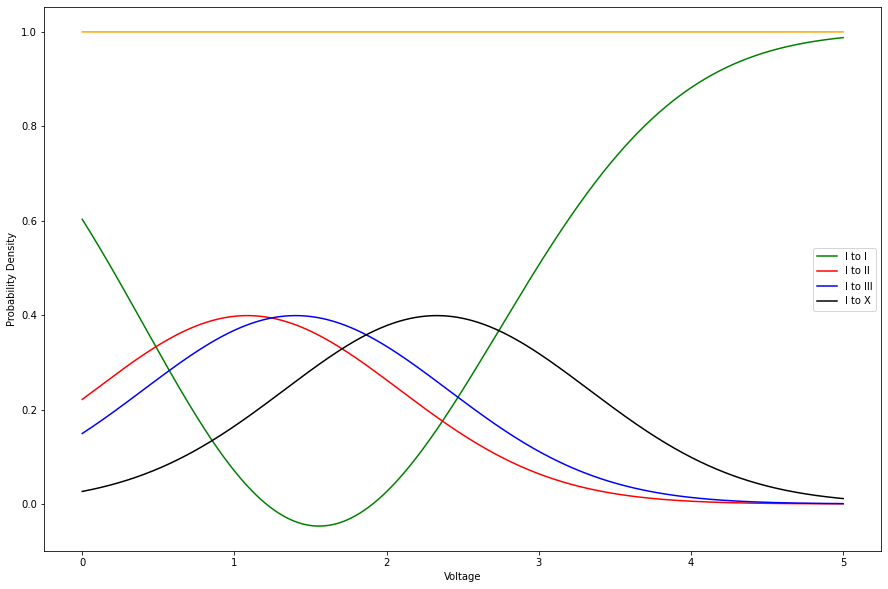

<Figure size 432x288 with 0 Axes>

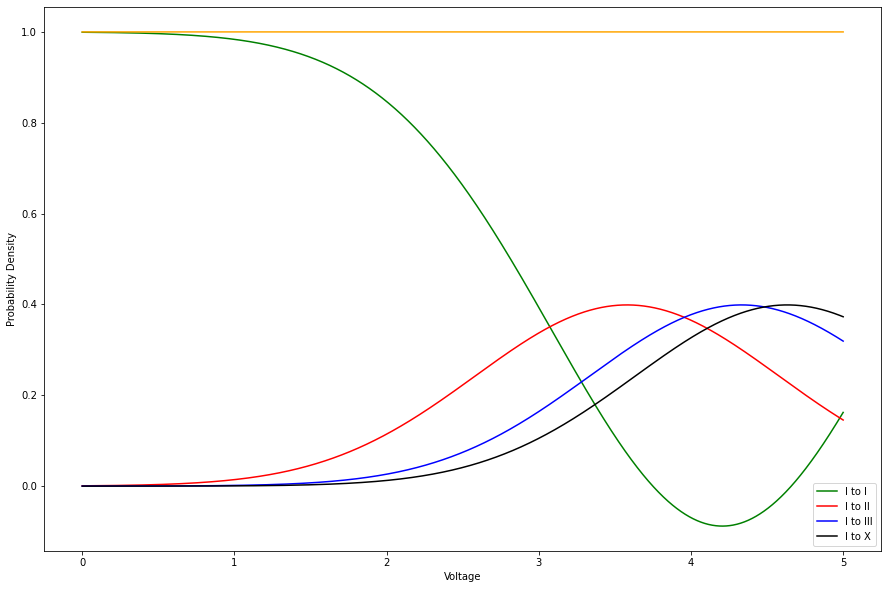

<Figure size 432x288 with 0 Axes>

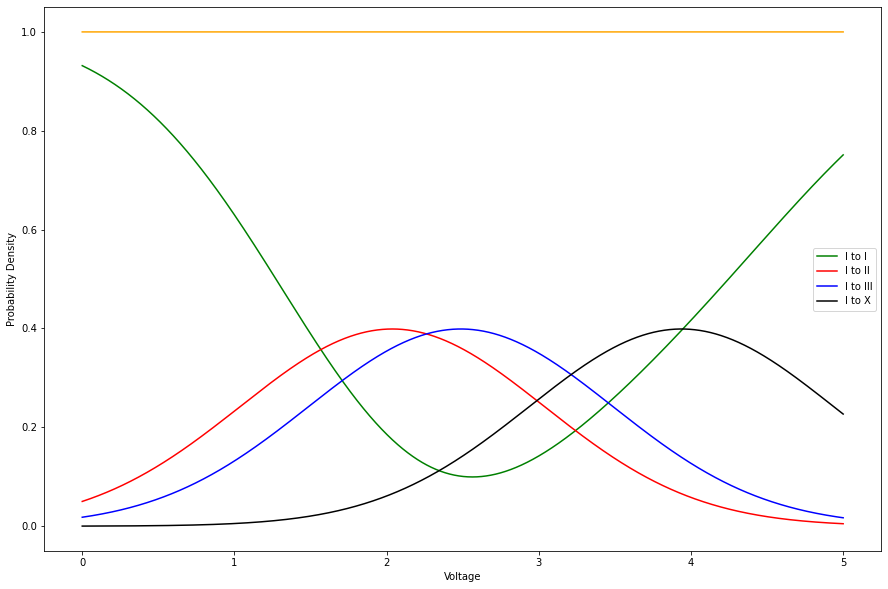

In [2]:
# Importing required libraries
 
import numpy as np
import random
import csv
import pandas as pd
import math
import matplotlib.pyplot as plt

 
#Creating a Function for normal distribution and sigmoid
def normal_dist(x , mean , sd=1):
    prob_density = (1/(sd*(2*np.pi)**(0.5)))* np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density

def sigmoid(x, a=1, b=7):
  
    z = np.exp(-a*x+b)
    sig = 1 / (1 + z)

    return sig

Vlow=0
Vup=5
p=2000  

v = np.linspace(Vlow,Vup,p) # Creating a series of data of in range of Vlow-Vup with p points.
finalList=[]
i=0
n=3
while i<n:
    i+=1
    pdfList=[]
   # mean1 = random.choice(v)
    mean1=random.randrange(0, 42500, 25)/10000
    mean2 = random.randrange(math.ceil((mean1+0.25)*10000), 45000, 25)/10000
    mean3 = random.randrange(math.ceil((mean2+0.25)*10000), 50000, 25)/10000
  

    pdf1=normal_dist(v,mean1)
    pdf2=normal_dist(v,mean2)
    pdf3=normal_dist(v,mean3)
#check the sum of the 3 pdfs doesn't exceeds 1
    pdf4=1-(pdf1+pdf2+pdf3)
    Cpdf= pdf1+pdf2+pdf3+pdf4
    data = {'pd1':pdf1  ,
    'pd2': pdf2, 'pd3': pdf3,'pd4': pdf4 } 
    
    # Creating DataFrame
    df = pd.DataFrame(data) 

    # Converting dataframe to list
    List = df.values.tolist()
    finalList.append(List)
    fig = plt.figure( )  

    plt.figure(figsize=(15, 10))
    plt.plot(v,pdf4 , color = 'green')
    plt.plot(v,pdf1 , color = 'red')
    plt.plot(v,pdf2 , color = 'blue')
    plt.plot(v,pdf3 , color = 'k')
    plt.plot(v,Cpdf , color = 'orange')

    plt.legend(["I to I","I to II", "I to III", "I to X"])
    plt.xlabel('Voltage')
    plt.ylabel('Probability Density')
    fig.savefig('pdd') 
    plt.show()

### Markov Decision Process 

In [4]:
states=['II','III','X','I']
vi=1000
probI, probII, probIII, probX = 0, 0, 0, 0

for i in range(n):
    p=finalList[i][vi]
    change = np.random.choice(states,replace=True,p=p)
    if change == states[0]:
        probII+=p[0]
    elif change == states[1]:
        probIII+=p[1]
    elif change == states[2]:
        probX+=p[2]
    else:
        probI+=p[3]
       
        
    print(change)
print('The probablity of remaining in the same state(I) is:',probI/n)
print('The probablity of transiting to state II is:',probII/n)
print('The probablity of transiting to state III is:',probIII/n)
print('The probablity of transiting to state X is:',probX/n)


III
I
III
The probablity of remaining in the same state(I) is: 0.1387456575611705
The probablity of transiting to state II is: 0.0
The probablity of transiting to state III is: 0.16867598359337413
The probablity of transiting to state X is: 0.0
